In [3]:
# import sys
# print(sys.executable)

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#  referencia do dataset 
# https://www.kaggle.com/datasets/ricardotorresheredia/nba-stats-from-the-last-71-years
# https://ge.globo.com/basquete/nba/noticia/2024/06/18/campeoes-da-nba-confira-os-vencedores-de-todas-as-edicoes-e-curiosidades.ghtml
# analise "de trás para frente" dos campeões da NBA https://poe.com/s/76HKJVmPILjk7unQiVMj
# sigla com o nome dos times https://poe.com/s/EYzHbWvL5owhCOO7Vvqq
# fonte com a siglas dos times https://poe.com/s/Nmf2dGW7fN0YeMiHSe2V


In [6]:
# Criar um dataframe com os campeões e vice-campeões
champions_data = [
    (1989, 'Detroit Pistons', 'Los Angeles Lakers'),
    (1990, 'Detroit Pistons', 'Portland Trail Blazers'),
    (1991, 'Chicago Bulls', 'Los Angeles Lakers'),
    (1992, 'Chicago Bulls', 'Portland Trail Blazers'),
    (1993, 'Chicago Bulls', 'Phoenix Suns'),
    (1994, 'Houston Rockets', 'New York Knicks'),
    (1995, 'Houston Rockets', 'Orlando Magic'),
    (1996, 'Chicago Bulls', 'Seattle SuperSonics'),
    (1997, 'Chicago Bulls', 'Utah Jazz'),
    (1998, 'Chicago Bulls', 'Utah Jazz'),
    (1999, 'San Antonio Spurs', 'New York Knicks'),
    (2000, 'Los Angeles Lakers', 'Indiana Pacers'),
    (2001, 'Los Angeles Lakers', 'Philadelphia 76ers'),
    (2002, 'Los Angeles Lakers', 'New Jersey Nets'),
    (2003, 'San Antonio Spurs', 'New Jersey Nets'),
    (2004, 'Detroit Pistons', 'Los Angeles Lakers'),
    (2005, 'San Antonio Spurs', 'Detroit Pistons'),
    (2006, 'Miami Heat', 'Dallas Mavericks'),
    (2007, 'San Antonio Spurs', 'Cleveland Cavaliers'),
    (2008, 'Boston Celtics', 'Los Angeles Lakers'),
    (2009, 'Los Angeles Lakers', 'Orlando Magic'),
    (2010, 'Los Angeles Lakers', 'Boston Celtics'),
    (2011, 'Dallas Mavericks', 'Miami Heat'),
    (2012, 'Miami Heat', 'Oklahoma City Thunder'),
    (2013, 'Miami Heat', 'San Antonio Spurs'),
    (2014, 'San Antonio Spurs', 'Miami Heat'),
    (2015, 'Golden State Warriors', 'Cleveland Cavaliers'),
    (2016, 'Cleveland Cavaliers', 'Golden State Warriors'),
    (2017, 'Golden State Warriors', 'Cleveland Cavaliers'),
    (2018, 'Golden State Warriors', 'Cleveland Cavaliers'),
    (2019, 'Toronto Raptors', 'Golden State Warriors'),
    (2020, 'Los Angeles Lakers', 'Miami Heat'),
    (2021, 'Milwaukee Bucks', 'Phoenix Suns'),
    (2022, 'Golden State Warriors', 'Boston Celtics'),
]

# Transformar os dados em um dataframe
champions_df = pd.DataFrame(champions_data, columns=['Year', 'Champion', 'Runner-Up'])

In [7]:
# Caminho do arquivo .ods
caminho_pasta = r"C:\Users\aoliveira_esss\Desktop\projeto_nba\NBA\NBA_Stats_71_Years_Updated.xlsx"
abreviacao = r"C:\Users\aoliveira_esss\Desktop\projeto_nba\NBA\abreviacao_times.csv"

# Carregar o arquivo .ods em um DataFrame
df_nba = pd.read_excel(caminho_pasta)
df_abreviacao = pd.read_csv(abreviacao, encoding="utf-8", sep=",")


# Exibir as primeiras linhas para verificar
df_nba.head()

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,NaN,NaN,NaN,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,NaN,NaN,NaN,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,NaN,NaN,NaN,269,1052,935,NaN,NaN


In [8]:
df_abreviacao.head()

,Abreviação,Nome do Time
0,CHI,Chicago Bulls
1,UTH,Utah Jazz
2,NYK,New York Knicks
3,GOS,Golden State Warriors
4,SAN,San Antonio Spurs


In [9]:
# Criar um dicionário para mapear Abreviação -> Nome do Time
team_name_mapping = dict(zip(df_abreviacao['Abreviação'], df_abreviacao['Nome do Time']))

# Exibir o dicionário para verificar
print(team_name_mapping)

{'CHI': 'Chicago Bulls', 'UTH': 'Utah Jazz', 'NYK': 'New York Knicks', 'GOS': 'Golden State Warriors', 'SAN': 'San Antonio Spurs', 'ATL': 'Atlanta Hawks', 'IND': 'Indiana Pacers', 'PHL': 'Philadelphia 76ers', 'WAS': 'Washington Wizards', 'POR': 'Portland Trail Blazers', 'DEN': 'Denver Nuggets', 'PHX': 'Phoenix Suns', 'MIN': 'Minnesota Timberwolves', 'LAL': 'Los Angeles Lakers', 'CLE': 'Cleveland Cavaliers', 'DET': 'Detroit Pistons', 'SEA': 'Seattle SuperSonics', 'DAL': 'Dallas Mavericks', 'SAC': 'Sacramento Kings', 'NJN': 'New Jersey Nets', 'LAC': 'Los Angeles Clippers', 'BOS': 'Boston Celtics', 'HOU': 'Houston Rockets', 'CHH': 'Charlotte Hornets', 'ORL': 'Orlando Magic', 'MIA': 'Miami Heat', 'MIL': 'Milwaukee Bucks', 'TOR': 'Toronto Raptors', 'VAN': 'Vancouver Grizzlies', 'UTA': 'Utah Jazz', 'GSW': 'Golden State Warriors', 'PHI': 'Philadelphia 76ers', 'SAS': 'San Antonio Spurs', 'MEM': 'Memphis Grizzlies', 'NOH': 'New Orleans Hornets', 'CHA': 'Charlotte Hornets', 'NOK': 'New Orleans/O

In [10]:
ano_de_corte = 1990
df_nba_1990 = df_nba[df_nba['Season Start Year'] >= ano_de_corte]



- fonte com a lista de cada abreviacao e o nome do time
https://www.apbr.org/abbreviations.html


In [11]:
# Adicionar a coluna "Team Full Name"
df_nba_1990['Team Full Name'] = df_nba_1990['Team'].map(team_name_mapping)

# Verificar o resultado
print(df_nba_1990[['Team', 'Team Full Name']].head())

      Team         Team Full Name
11569  CHI          Chicago Bulls
11570  UTH              Utah Jazz
11571  NYK        New York Knicks
11572  GOS  Golden State Warriors
11573  SAN      San Antonio Spurs


C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_16716\2266917709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba_1990['Team Full Name'] = df_nba_1990['Team'].map(team_name_mapping)


In [12]:
df_nba_1990['Team Full Name'].unique()

array(['Chicago Bulls', 'Utah Jazz', 'New York Knicks',
       'Golden State Warriors', 'San Antonio Spurs', 'Atlanta Hawks',
       'Indiana Pacers', 'Philadelphia 76ers', 'Washington Wizards',
       'Portland Trail Blazers', 'Denver Nuggets', 'Phoenix Suns',
       'Minnesota Timberwolves', 'Los Angeles Lakers',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Seattle SuperSonics',
       'Dallas Mavericks', 'Sacramento Kings', 'New Jersey Nets',
       'Los Angeles Clippers', 'Boston Celtics', 'Houston Rockets',
       'Charlotte Hornets', 'Orlando Magic', 'Miami Heat',
       'Milwaukee Bucks', 'Toronto Raptors', 'Vancouver Grizzlies',
       'Memphis Grizzlies', 'New Orleans Hornets',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [13]:
df_nba_1990['Season Start Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [14]:
df_nba_1990.dtypes

Rank                    int64
Year                   object
Season Start Year       int64
Season Type            object
Player ID               int64
Player                 object
Team ID                 int64
Team                   object
Games Played            int64
Minutes Played          int64
FG Made                 int64
FG Attempts             int64
FG %                  float64
3-Pt FG Made          float64
3-Pt FG Attempts      float64
3-Pt FG %             float64
FT Made                 int64
FT Attempts             int64
FT %                  float64
Offensive Rebounds    float64
Defensive Rebounds    float64
Rebounds                int64
Assists                 int64
Steals                float64
Blocks                float64
Turnovers             float64
Personal Fouls          int64
Points Scored           int64
Efficency               int64
AST/TOV               float64
STL/TOV               float64
Team Full Name         object
dtype: object

In [15]:
# verificar valores ausentes
valores_ausentes = df_nba_1990.isnull().sum()
valores_ausentes

Rank                  0
Year                  0
Season Start Year     0
Season Type           0
Player ID             0
Player                0
Team ID               0
Team                  0
Games Played          0
Minutes Played        0
FG Made               0
FG Attempts           0
FG %                  0
3-Pt FG Made          0
3-Pt FG Attempts      0
3-Pt FG %             0
FT Made               0
FT Attempts           0
FT %                  0
Offensive Rebounds    0
Defensive Rebounds    0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Personal Fouls        0
Points Scored         0
Efficency             0
AST/TOV               0
STL/TOV               0
Team Full Name        0
dtype: int64

In [16]:
# calcular a porcentagem de valores ausentes
porcentagem_ausentes = (valores_ausentes / len(df_nba_1990)) * 100
porcentagem_ausentes

Rank                  0.0
Year                  0.0
Season Start Year     0.0
Season Type           0.0
Player ID             0.0
Player                0.0
Team ID               0.0
Team                  0.0
Games Played          0.0
Minutes Played        0.0
FG Made               0.0
FG Attempts           0.0
FG %                  0.0
3-Pt FG Made          0.0
3-Pt FG Attempts      0.0
3-Pt FG %             0.0
FT Made               0.0
FT Attempts           0.0
FT %                  0.0
Offensive Rebounds    0.0
Defensive Rebounds    0.0
Rebounds              0.0
Assists               0.0
Steals                0.0
Blocks                0.0
Turnovers             0.0
Personal Fouls        0.0
Points Scored         0.0
Efficency             0.0
AST/TOV               0.0
STL/TOV               0.0
Team Full Name        0.0
dtype: float64

In [17]:
# exibir colunas com valores ausentes
colunas_ausentes = porcentagem_ausentes[porcentagem_ausentes > 0]
colunas_ausentes

Series([], dtype: float64)

In [18]:
# Listando estilos disponíveis
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [19]:
# analise da métrica de pontos por jogo https://poe.com/s/GvwpTWbGmkoN88a9aYsx

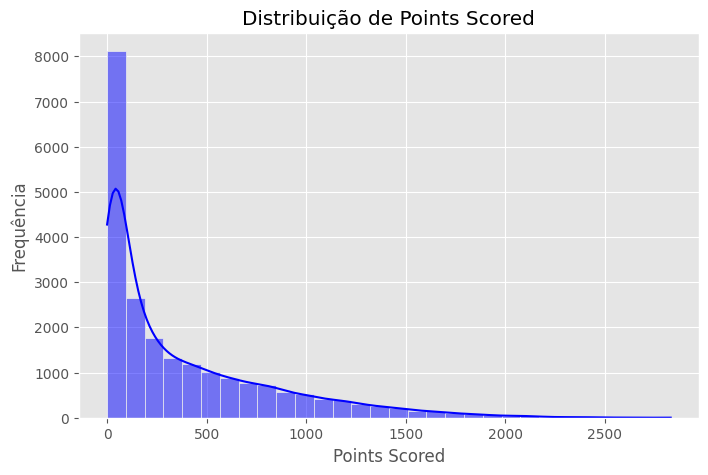

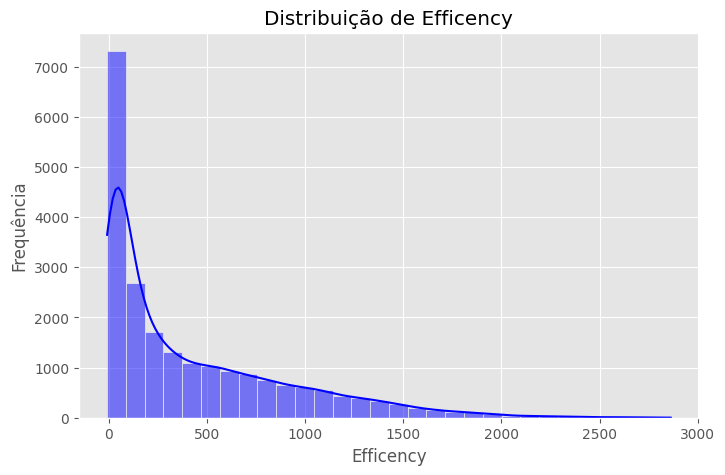

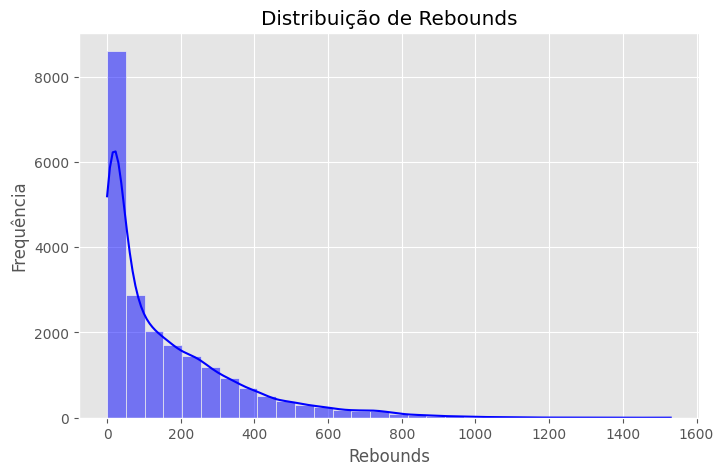

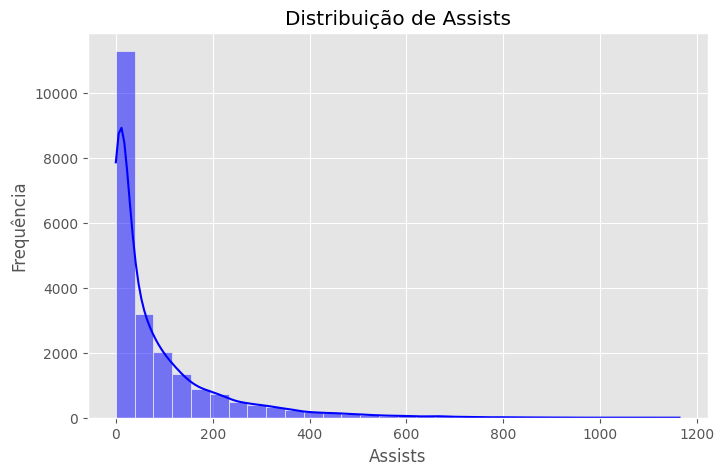

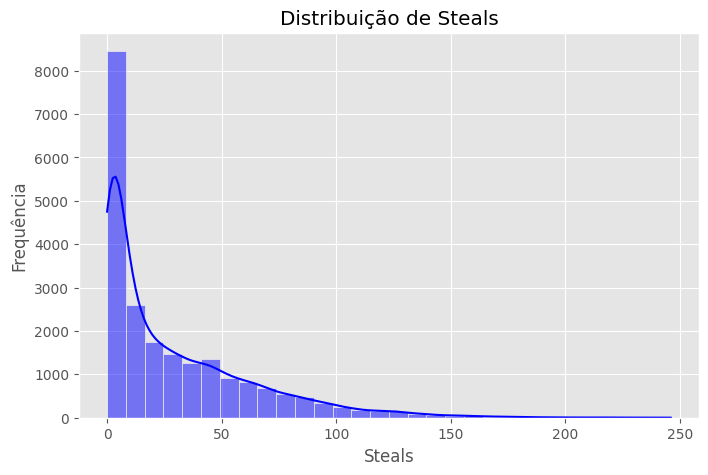

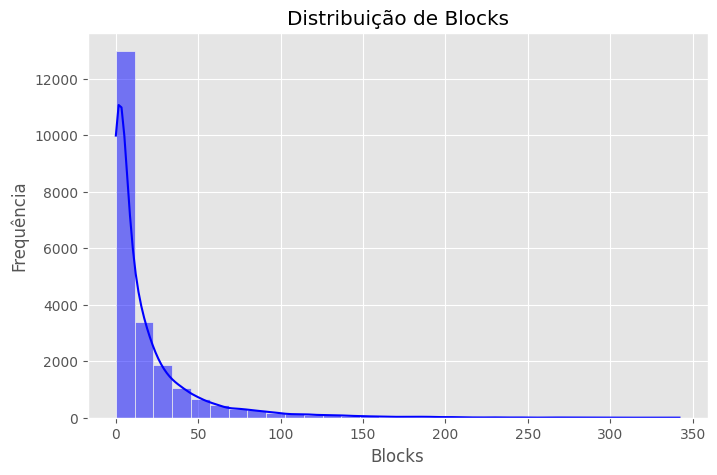

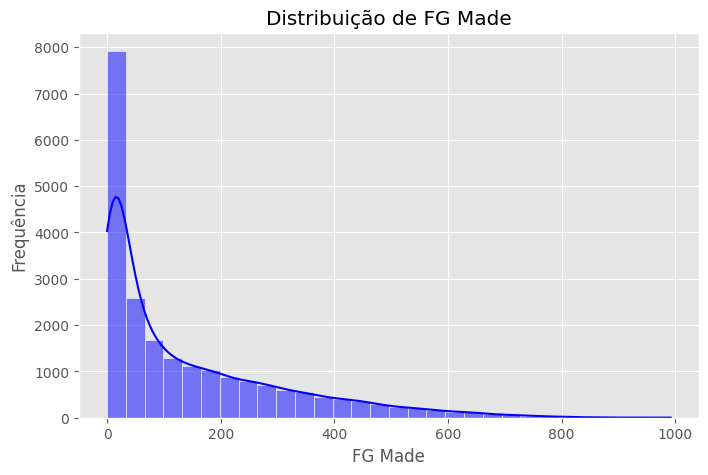

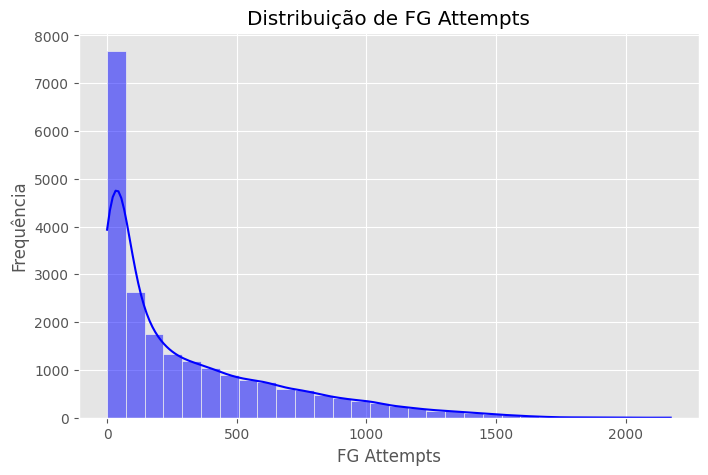

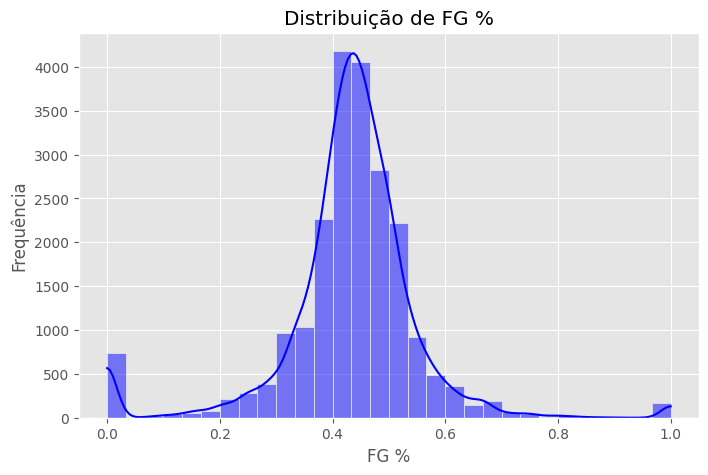

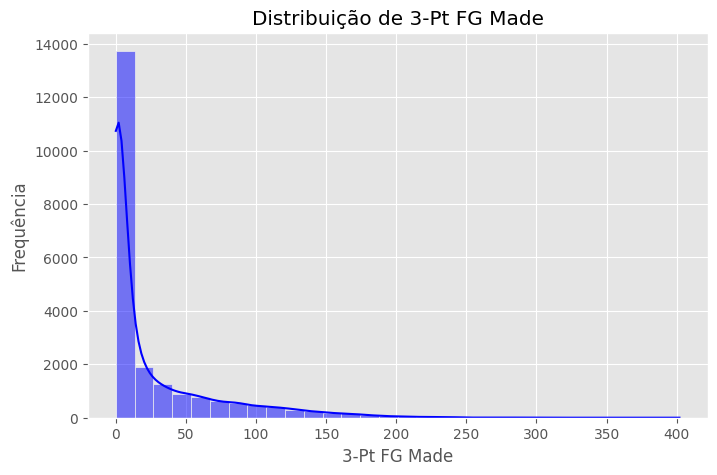

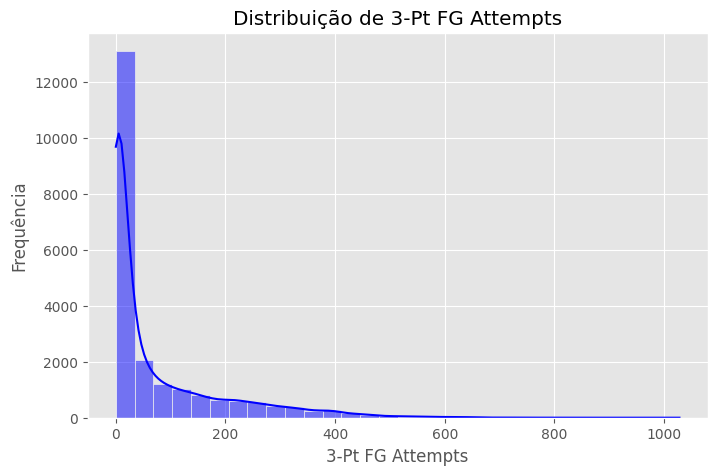

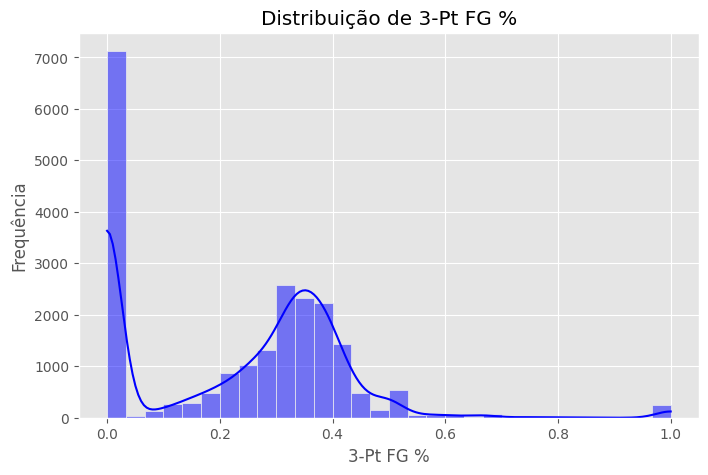

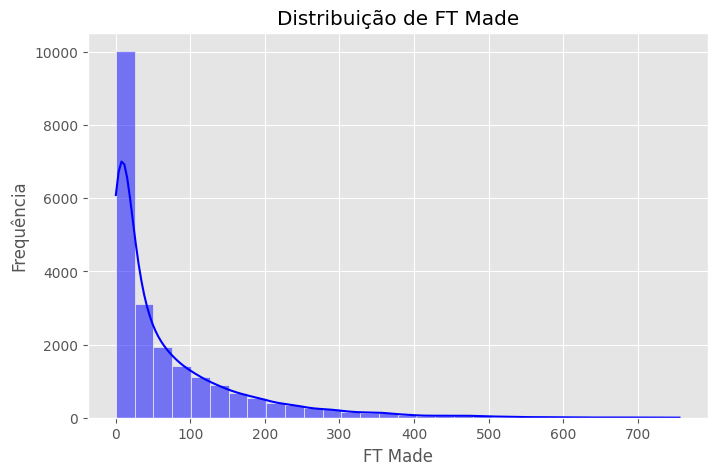

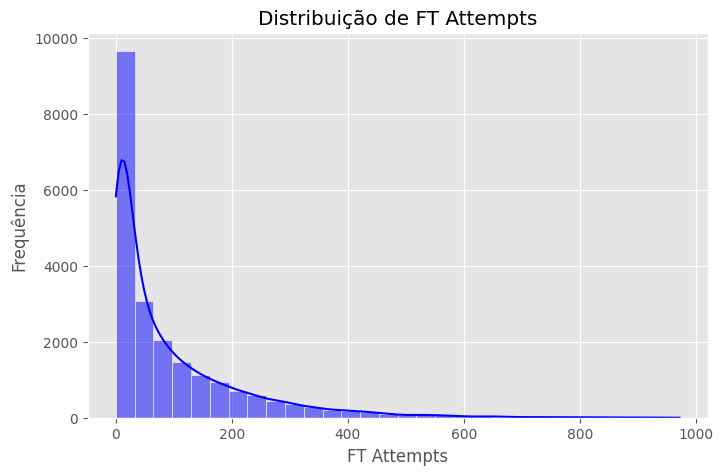

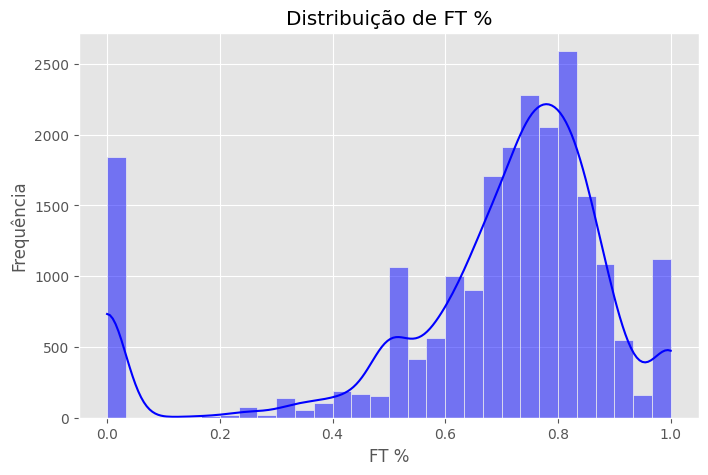

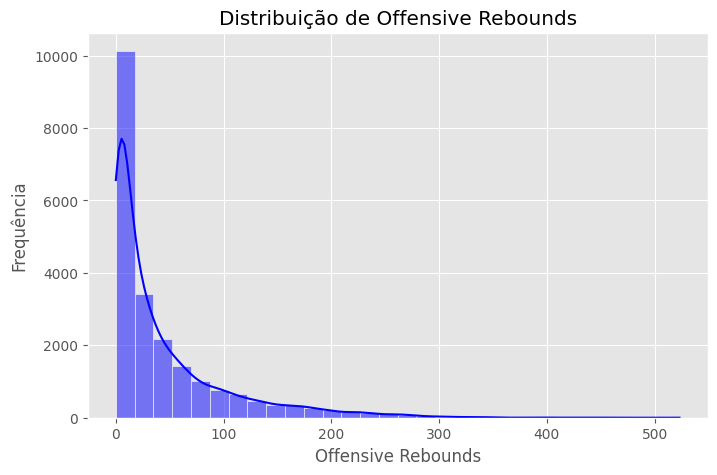

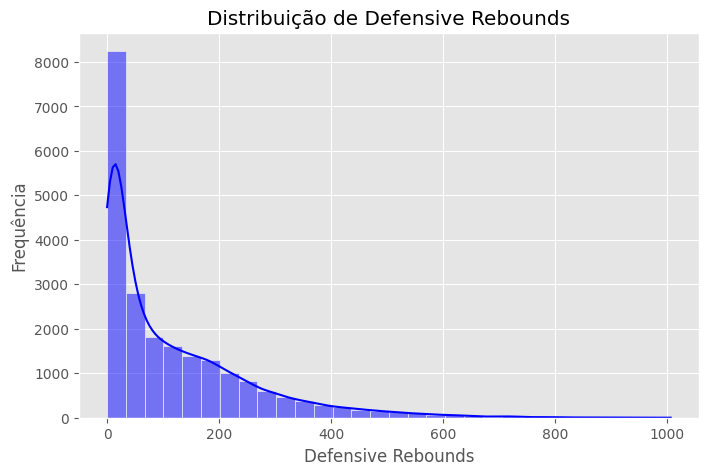

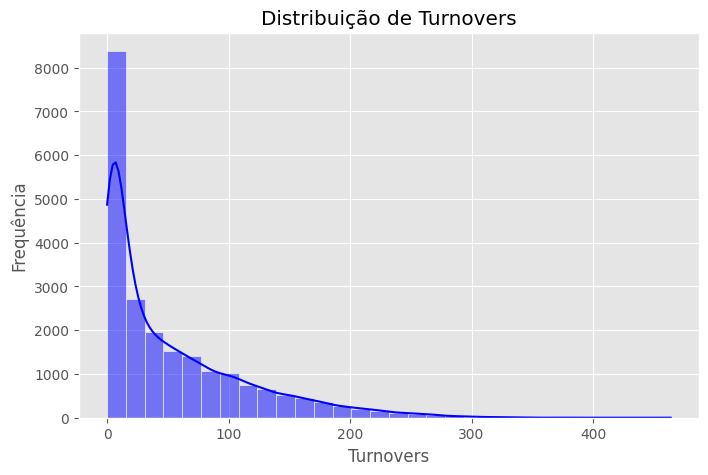

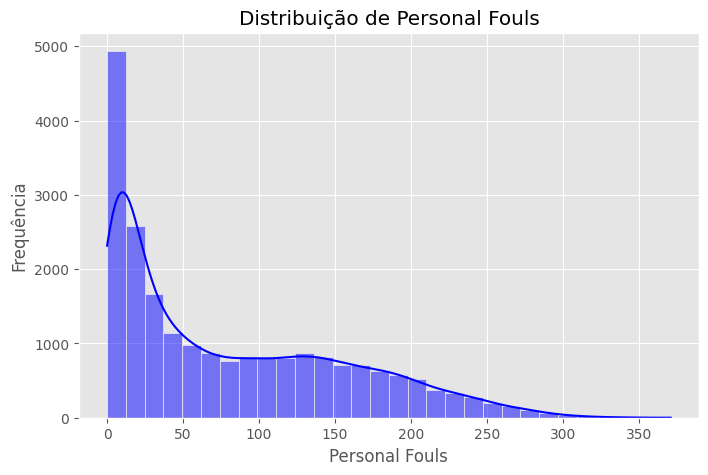

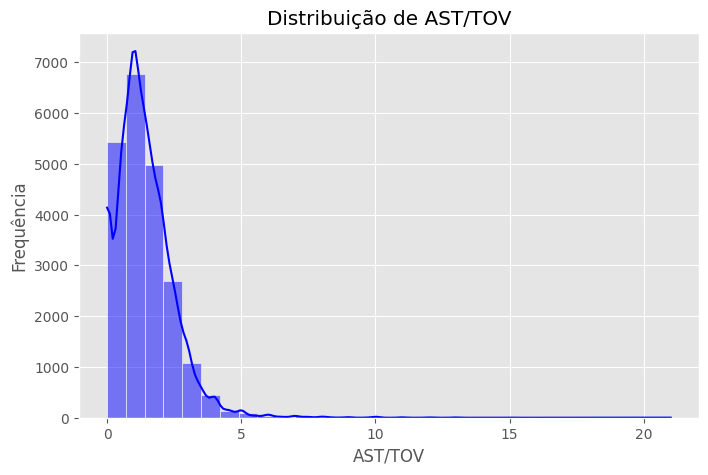

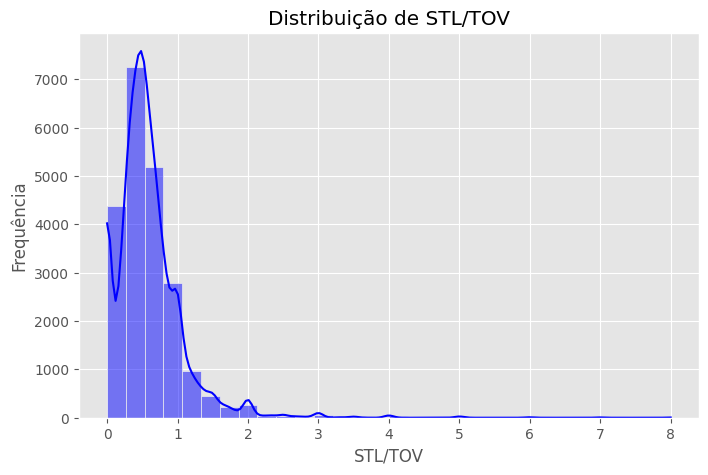

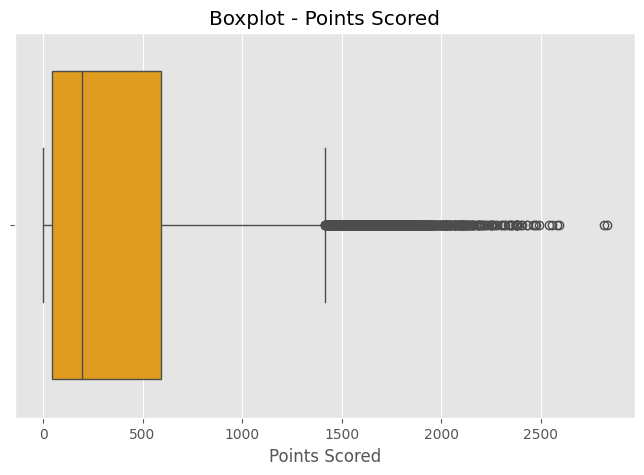

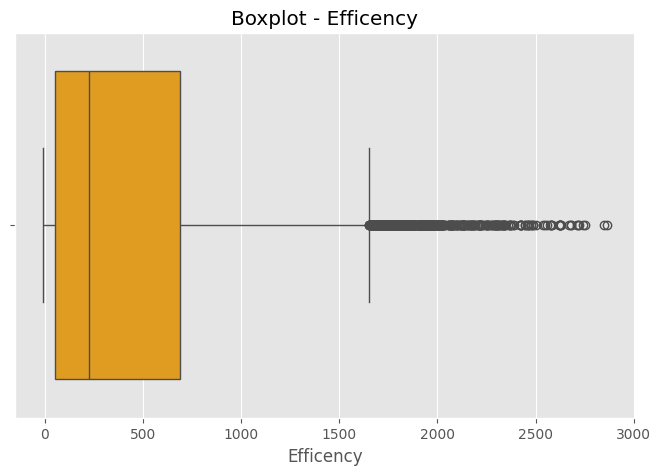

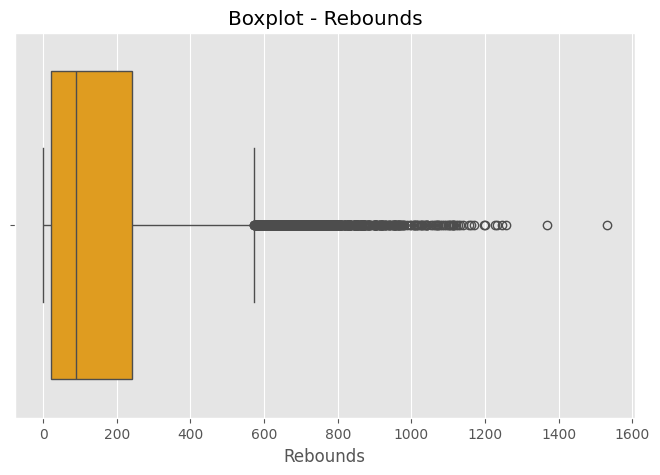

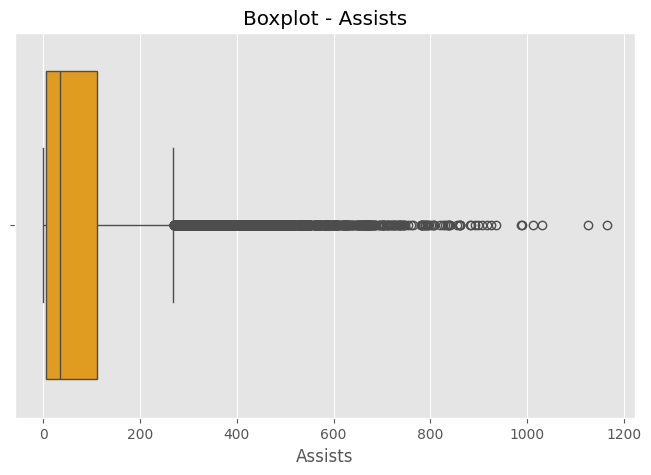

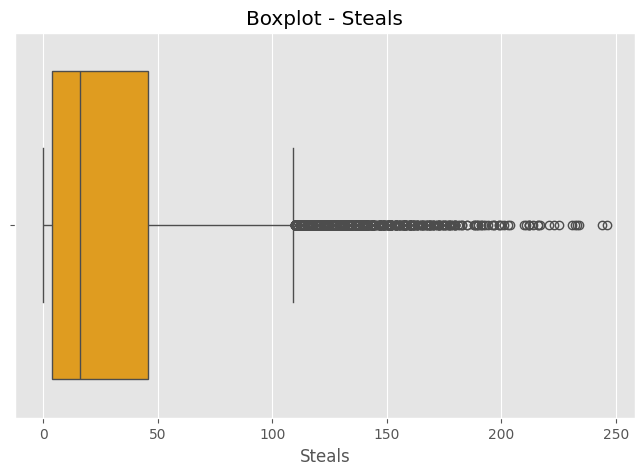

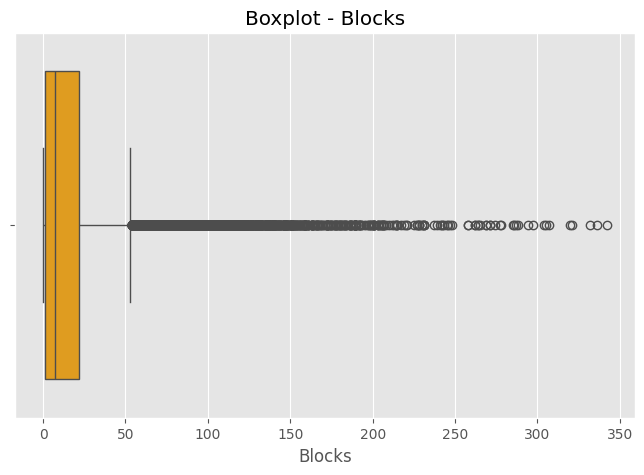

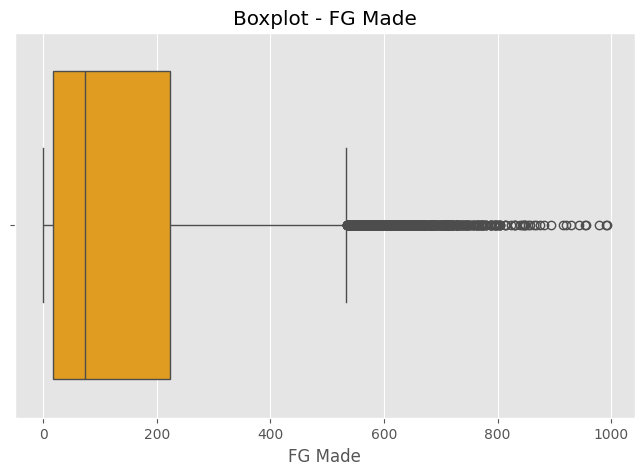

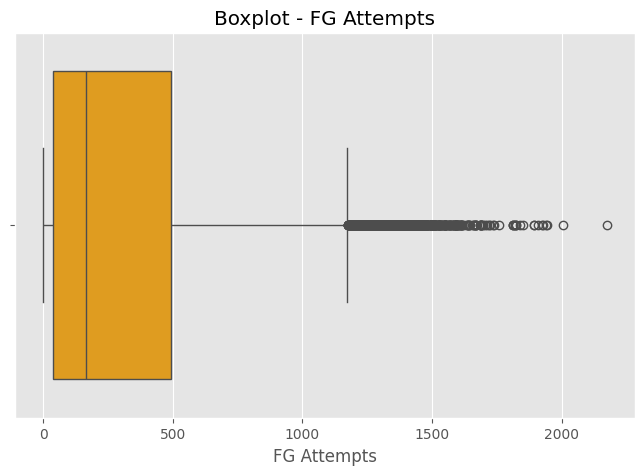

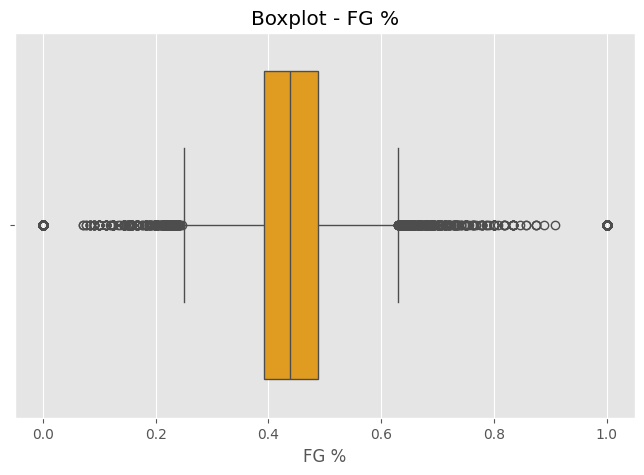

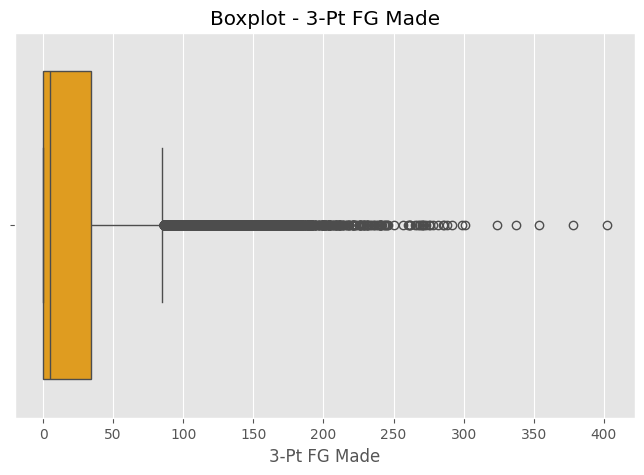

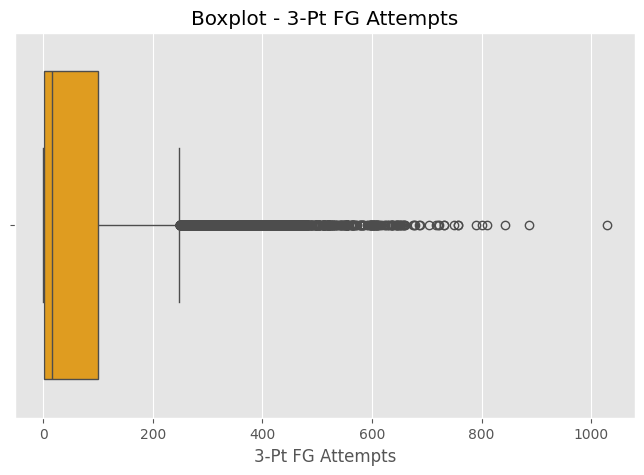

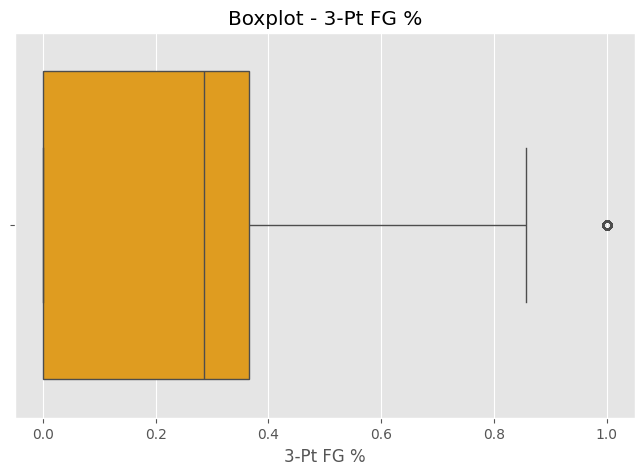

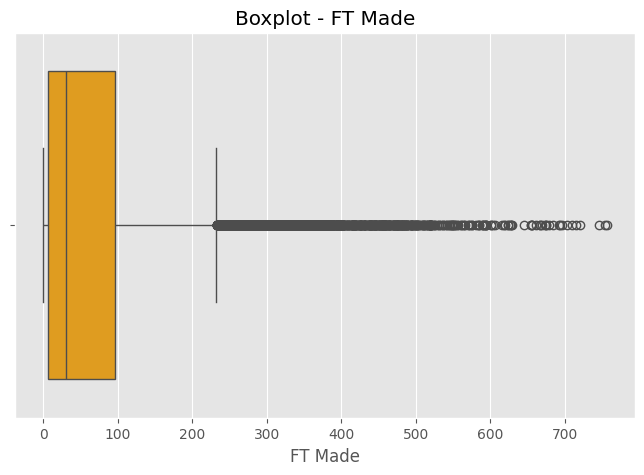

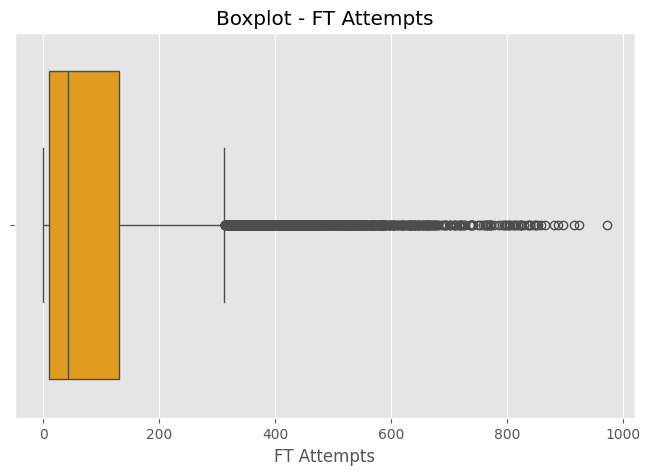

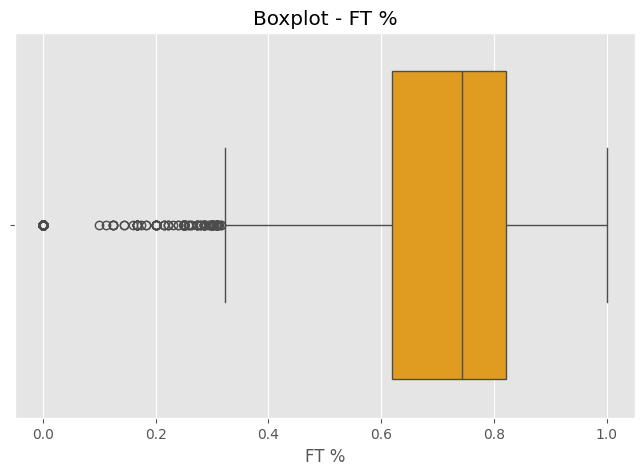

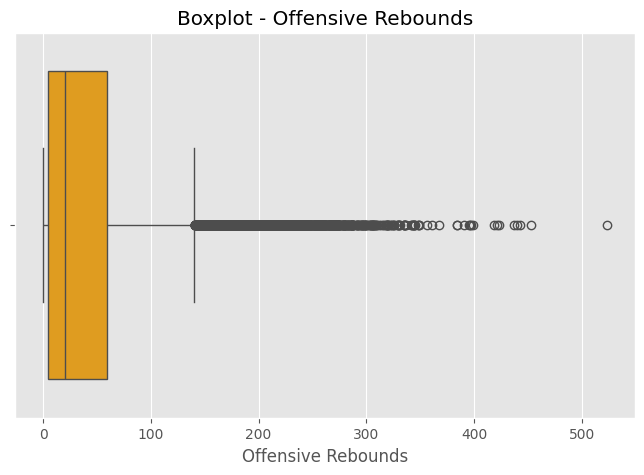

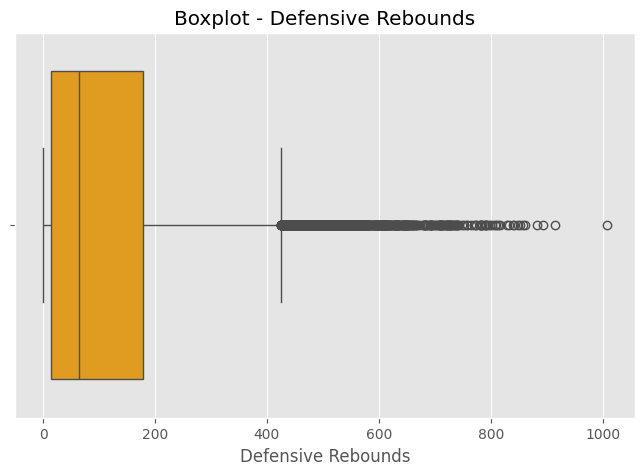

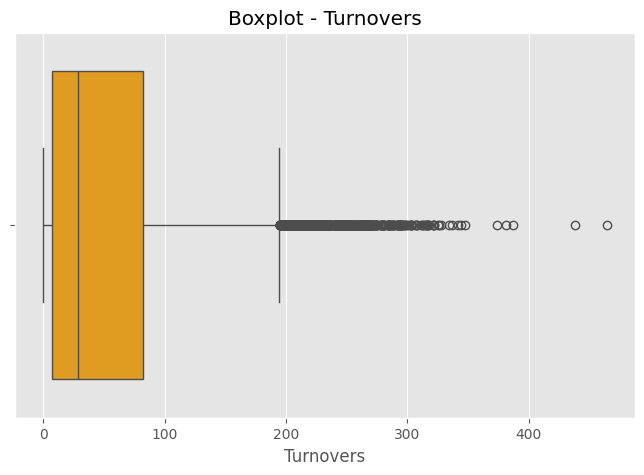

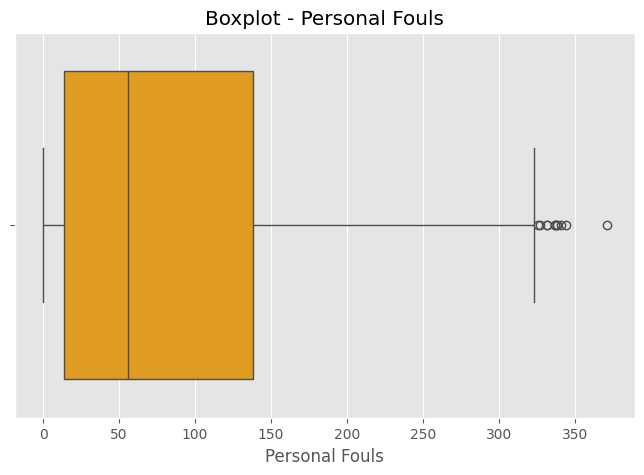

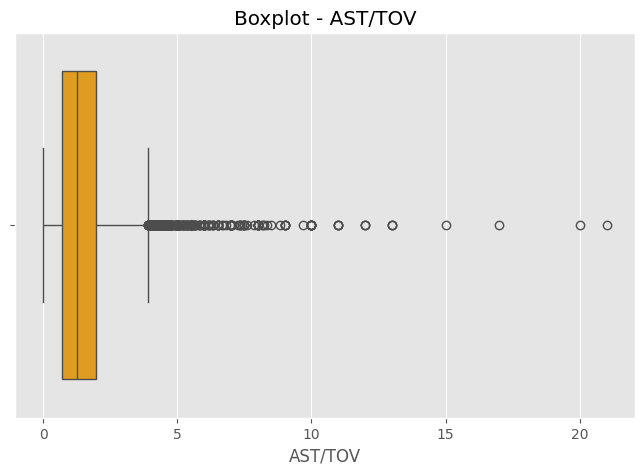

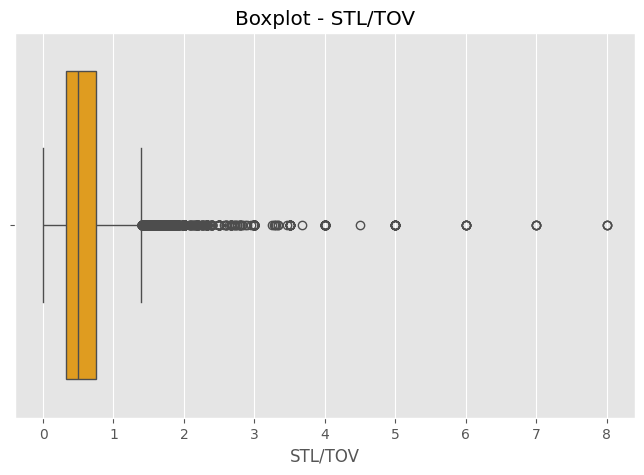

In [20]:
# Lista de métricas de jogo relevantes
metrics_to_plot = [
    'Points Scored', 'Efficency', 'Rebounds', 'Assists', 'Steals', 'Blocks',
    'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts', '3-Pt FG %',
    'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds', 'Defensive Rebounds',
    'Turnovers', 'Personal Fouls', 'AST/TOV', 'STL/TOV'
]

# Configurações gerais para os gráficos
plt.style.use('ggplot')

# Loop para criar histogramas para cada métrica de jogo
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_nba_1990[metric], kde=True, bins=30, color='blue')
    plt.title(f"Distribuição de {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequência")
    plt.show()

# Loop para criar boxplots para cada métrica de jogo
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_nba_1990, x=metric, color='orange')
    plt.title(f"Boxplot - {metric}")
    plt.xlabel(metric)
    plt.show()

In [21]:
# analise de pontos por ano e por jogador https://poe.com/s/d3btGqDOFMYXG1p1SE6k

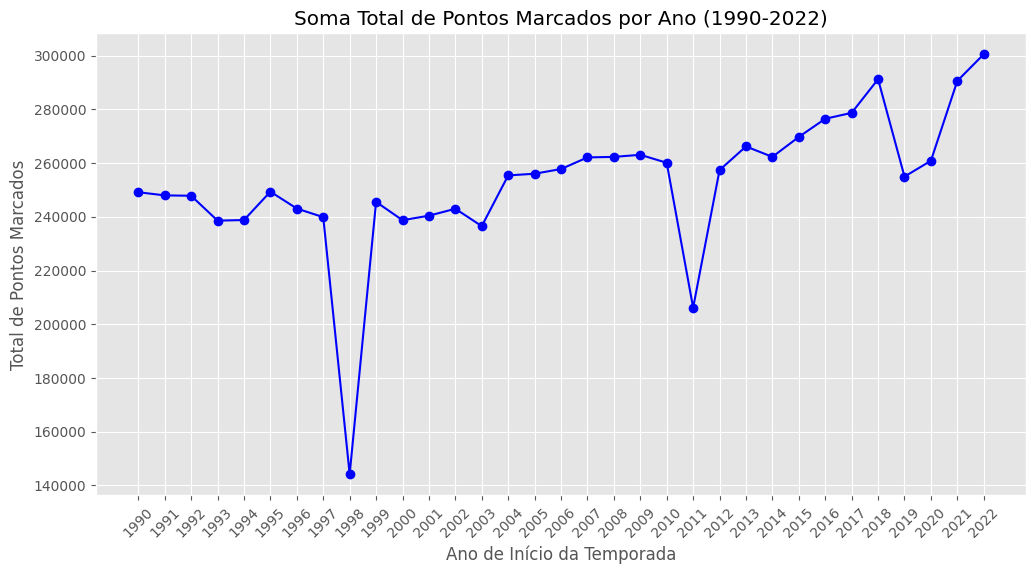

In [22]:

# Agrupando por ano (Season Start Year) e somando os pontos
points_by_year = df_nba_1990.groupby('Season Start Year')['Points Scored'].sum()

# Plotando a soma de pontos por ano
plt.figure(figsize=(12, 6))
plt.plot(points_by_year.index, points_by_year.values, marker='o', color='blue')
plt.title("Soma Total de Pontos Marcados por Ano (1990-2022)")
plt.xlabel("Ano de Início da Temporada")
plt.ylabel("Total de Pontos Marcados")
plt.xticks(ticks=points_by_year.index, labels=points_by_year.index, rotation=45)  # Rótulos personalizados
plt.grid(True)
plt.show()

In [23]:
# Contar o número de equipes únicas por ano
teams_per_year = df_nba_1990.groupby('Season Start Year')['Team ID'].nunique()

# Exibir o resultado
print("Número de equipes únicas por ano:")
print(teams_per_year)

Número de equipes únicas por ano:
Season Start Year
1990    27
1991    27
1992    27
1993    27
1994    27
1995    29
1996    29
1997    29
1998    29
1999    29
2000    29
2001    29
2002    29
2003    29
2004    30
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
2017    30
2018    30
2019    30
2020    30
2021    30
2022    30
Name: Team ID, dtype: int64


In [24]:
df_nba_1990.columns

Index(['Rank', 'Year', 'Season Start Year', 'Season Type', 'Player ID',
       'Player', 'Team ID', 'Team', 'Games Played', 'Minutes Played',
       'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts',
       '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficency', 'AST/TOV',
       'STL/TOV', 'Team Full Name'],
      dtype='object')

In [25]:
# Ajustar o agrupamento somando os pontos de todos os tipos de temporada
points_by_player = df_nba_1990.groupby(['Season Start Year', 'Player']).agg({
    'Points Scored': 'sum'  # Soma total de pontos considerando todas as temporadas
}).reset_index()

# Ordenar os jogadores pelo total de pontos em ordem decrescente
points_by_player = points_by_player.sort_values(by=['Season Start Year', 'Points Scored'], ascending=[True, False])

# Exibir os primeiros registros
print("DataFrame corrigido com pontos por jogador por ano:")
print(points_by_player.head(10))  # Mostrar os 10 maiores pontuadores

DataFrame corrigido com pontos por jogador por ano:
     Season Start Year             Player  Points Scored
248               1990     Michael Jordan           3109
191               1990        Karl Malone           2649
54                1990       Chris Mullin           2297
103               1990  Dominique Wilkins           2205
86                1990     David Robinson           2204
272               1990      Patrick Ewing           2204
62                1990      Clyde Drexler           2114
347               1990       Tim Hardaway           2108
154               1990       James Worthy           2049
48                1990    Charles Barkley           2048


In [26]:
# Adicionar colunas 'Champion Team' e 'Runner-Up Team' usando Team Full Name
def mark_championship(row):
    year = row['Season Start Year']
    team_full_name = row['Team Full Name']

    # Verificar se o ano e o nome completo da equipe correspondem ao campeão ou vice-campeão
    if year in champions_df['Year'].values:
        champion_team = champions_df.loc[champions_df['Year'] == year, 'Champion'].values[0]
        runner_up_team = champions_df.loc[champions_df['Year'] == year, 'Runner-Up'].values[0]
        
        if team_full_name == champion_team:
            return 'Champion'
        elif team_full_name == runner_up_team:
            return 'Runner-Up'
    return 'Other'

# Aplicar a função para criar uma nova coluna 'Team Status'
df_nba_1990['Team Status'] = df_nba_1990.apply(mark_championship, axis=1)

# Converter 'Team Status' em colunas binárias
df_nba_1990['Champion Team'] = (df_nba_1990['Team Status'] == 'Champion').astype(int)
df_nba_1990['Runner-Up Team'] = (df_nba_1990['Team Status'] == 'Runner-Up').astype(int)

C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_16716\2403573331.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba_1990['Team Status'] = df_nba_1990.apply(mark_championship, axis=1)
C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_16716\2403573331.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba_1990['Champion Team'] = (df_nba_1990['Team Status'] == 'Champion').astype(int)
C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_16716\2403573331.py:22: SettingWithCopyWarning: 
A va

In [27]:
# métrica para analisar cada ano https://poe.com/s/BoppSbNmmb1X8dwMV3OH

In [28]:
def calculate_metrics_by_year(df_year, metrics):
    # Calcular métricas para o time campeão
    champion_metrics = df_year[df_year['Champion Team'] == 1][metrics].mean()

    # Calcular métricas para o time vice-campeão
    runner_up_metrics = df_year[df_year['Runner-Up Team'] == 1][metrics].mean()

    # Calcular métricas para os demais times
    other_metrics = df_year[
        (df_year['Champion Team'] == 0) & (df_year['Runner-Up Team'] == 0)
    ][metrics].mean()

    return champion_metrics, runner_up_metrics, other_metrics

In [29]:
# Lista para armazenar os resultados
results = []

# Iterar pelos anos únicos
for year in df_nba_1990['Season Start Year'].unique():
    # Filtrar os dados do ano
    df_year = df_nba_1990[df_nba_1990['Season Start Year'] == year]

    # Calcular as métricas
    champion_metrics, runner_up_metrics, other_metrics = calculate_metrics_by_year(df_year, metrics_to_plot)

    # Armazenar os resultados no formato desejado
    for metric in metrics_to_plot:
        results.append({
            'Year': year,
            'Metric': metric,
            'Champion': champion_metrics.get(metric, None),
            'Runner-Up': runner_up_metrics.get(metric, None),
            'Other': other_metrics.get(metric, None),
        })

In [30]:
# Criar o DataFrame final
comparison_df = pd.DataFrame(results)

# Exibir os primeiros resultados
print(comparison_df.head(10))

   Year         Metric    Champion   Runner-Up       Other
0  1990  Points Scored  373.884615  488.208333  436.252874
1  1990      Efficency  416.269231  549.750000  493.287356
2  1990       Rebounds  166.500000  189.500000  176.940613
3  1990        Assists   82.153846  112.250000  101.344828
4  1990         Steals   21.807692   37.875000   35.517241
5  1990         Blocks   16.384615   19.583333   21.660920
6  1990        FG Made  145.038462  186.750000  169.446360
7  1990    FG Attempts  314.384615  386.958333  357.093870
8  1990           FG %    0.463346    0.468875    0.461667
9  1990   3-Pt FG Made    6.807692   16.416667    9.296935


In [31]:
# propostas de melhoria na análise https://poe.com/s/n44skdytwLDxupBG5Xho
# pedido https://poe.com/s/uAQL0jt7WUDHG3sgnsFj
# resposta https://poe.com/s/CRPOFGDLCa9hCTBkhamR

# pedido https://poe.com/s/l5U8lg4QQHxrsMnH916L
# resposta https://poe.com/s/0ZirWPcYIaLpq9TAhZ17

In [32]:
def classify_teams_by_playoffs(df):
    """
    Filtra os dados da temporada regular e adiciona uma coluna indicando 
    se o time foi para os Playoffs.
    """
    # Identificar os times que foram para os Playoffs
    playoff_teams = df[df['Season Type'] == 'Playoffs']
    playoff_teams_by_year = playoff_teams.groupby('Season Start Year')['Team Full Name'].unique().to_dict()

    # Filtrar os dados da temporada regular
    regular_season = df[df['Season Type'] == 'Regular Season']

    # Adicionar uma nova coluna para classificar os times
    regular_season['Playoff Status'] = regular_season.apply(
        lambda row: 'Playoffs' if row['Team Full Name'] in playoff_teams_by_year.get(row['Season Start Year'], []) else 'Non-Playoffs',
        axis=1
    )

    return regular_season

def analyze_metrics_by_year(df, metrics):
    """
    Compara métricas entre times de Playoffs e Non-Playoffs ano a ano.
    """
    results = []

    # Iterar por ano
    for year, year_data in df.groupby('Season Start Year'):
        # Separar os dois grupos (Playoffs e Non-Playoffs)
        playoff_data = year_data[year_data['Playoff Status'] == 'Playoffs']
        non_playoff_data = year_data[year_data['Playoff Status'] == 'Non-Playoffs']

        # Comparar as métricas
        for metric in metrics:
            # Calcular média e mediana para cada grupo
            playoff_mean = playoff_data[metric].mean()
            playoff_median = playoff_data[metric].median()
            non_playoff_mean = non_playoff_data[metric].mean()
            non_playoff_median = non_playoff_data[metric].median()

            # Armazenar os resultados
            results.append({
                'Season Start Year': year,
                'Metric': metric,
                'Playoff Mean': playoff_mean,
                'Playoff Median': playoff_median,
                'Non-Playoff Mean': non_playoff_mean,
                'Non-Playoff Median': non_playoff_median
            })

    # Retornar os resultados como DataFrame
    return pd.DataFrame(results)


# Filtrar e classificar os dados
classified_df_nba_1990 = classify_teams_by_playoffs(df_nba_1990)

# Definir as métricas a serem analisadas
metrics_to_analyze = [
    'Points Scored', 'Rebounds', 'Assists', 'Steals', 'Blocks',
    'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts', '3-Pt FG %',
    'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds', 'Defensive Rebounds',
    'Turnovers', 'Personal Fouls', 'AST/TOV', 'STL/TOV'
]

# Realizar a análise por ano
yearly_analysis_results = analyze_metrics_by_year(classified_df_nba_1990, metrics_to_analyze)

# Exibir os primeiros resultados
yearly_analysis_results.head(10)

C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_16716\277932486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season['Playoff Status'] = regular_season.apply(


,Season Start Year,Metric,Playoff Mean,Playoff Median,Non-Playoff Mean,Non-Playoff Median
0,1990,Points Scored,648.695455,464.5000,556.132530,430.0000
1,1990,Rebounds,259.381818,189.0000,232.777108,194.5000
2,1990,Assists,150.468182,94.5000,129.445783,73.0000
3,1990,Steals,52.077273,41.0000,45.403614,35.0000
4,1990,Blocks,31.245455,14.0000,28.572289,15.0000
5,1990,FG Made,250.300000,179.5000,219.000000,168.0000
6,1990,FG Attempts,514.622727,388.5000,479.120482,393.5000
7,1990,FG %,0.463905,0.4735,0.442518,0.4445
8,1990,3-Pt FG Made,14.522727,2.0000,11.168675,2.0000
9,1990,3-Pt FG Attempts,44.277273,9.5000,36.421687,11.5000
